In [1]:
import deepxde as dde
import numpy as np
from deepxde.backend import pytorch
import torch
import matplotlib.pyplot as plt
from SIRD_deepxde_class import SIRD_deepxde_net
from SIRD_deepxde_class import Plot

seed = 0
np.random.seed(seed)
dde.config.set_random_seed(seed)

Using backend: pytorch



In [2]:
alpha_real = 0.2
beta_real = 0.05
gamma_real = 0.01

total  [2.02612971e+05 1.48624732e+03 3.76566865e+06 7.84673325e+05]
total  4754441.188794797


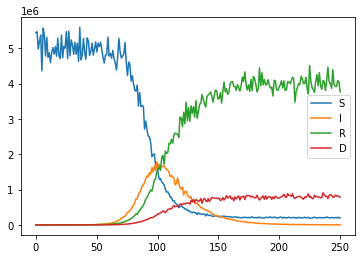

In [3]:
import ODE_SIR
solver = ODE_SIR.ODESolver()
t_synth, wsol_synth, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)
wsol_synth = solver.add_noise(wsol_synth, scale_pct=0.05)
solver.plot_SIRD(t_synth, wsol_synth)

In [4]:
max_timestep = 85
t_bool = t_synth < max_timestep
t = t_synth[t_bool]
wsol = wsol_synth[t_bool]

In [5]:
model = SIRD_deepxde_net(t, wsol)
model.init_model(print_every=1000)
model.train_model(iterations=11000)
alpha_nn, beta_nn, gamma_nn = model.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model.set_synthetic_data(t_synth, wsol_synth)
model.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000146 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [3.70e-03, 1.68e-03, 1.79e-02, 9.86e-04, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.04e-01, 2.18e-02, 6.07e-01, 3.39e-01, 1.07e-05, 5.25e-02, 6.96e-01, 3.67e-01]    [3.70e-03, 1.68e-03, 1.79e-02, 9.86e-04, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.04e-01, 2.18e-02, 6.07e-01, 3.39e-01, 1.07e-05, 5.25e-02, 6.96e-01, 3.67e-01]    []  
1000      [1.73e-05, 3.63e-06, 1.02e-06, 4.09e-07, 1.72e-06, 5.44e-07, 1.21e-06, 8.59e-07, 3.29e-03, 2.21e-04, 4.29e-05, 8.75e-06, 2.38e-04, 2.46e-05, 1.37e-05, 7.45e-06]    [1.73e-05, 3.63e-06, 1.02e-06, 4.09e-07, 1.72e-06, 5.44e-07, 1.21e-0

# Neumann BC

In [7]:
model_neu = SIRD_deepxde_net(t, wsol, with_neumann=True)
model_neu.init_model(print_every=1000)
model_neu.train_model(iterations=11000)
alpha_nn, beta_nn, gamma_nn = model_neu.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_neu.set_synthetic_data(t_synth, wsol_synth)
model_neu.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000119 s

Training model...

Step      Train loss                                                                                                                                                                                                  Test loss                                                                                                                                                                                                   Test metric
0         [8.91e-04, 3.53e-03, 9.96e-04, 4.65e-04, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 9.23e-01, 3.91e-02, 2.36e-01, 1.14e-02, 3.24e-01, 7.10e-07, 3.95e-01, 2.14e-02, 1.20e-02, 6.58e-04, 2.00e-04, 3.58e-06]    [8.91e-04, 3.53e-03, 9.96e-04, 4.65e-04, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 9.23e-01, 3.91e-02, 2.36e-01, 1.14e-02, 3.24e-01, 7.10e-07, 3.95e-01, 2.14e-02, 1.20e-02, 6.58e-04, 2.00e-04, 3.58e-06]    []  
1000      [1.03e-05, 3.98e-06, 1.19e-06, 2.70e-06, 2.68e-06, 2.30e-04, 1.06e-04, 3

In [8]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model_neu = Plot(model_neu, values_to_plot=values_to_plot)

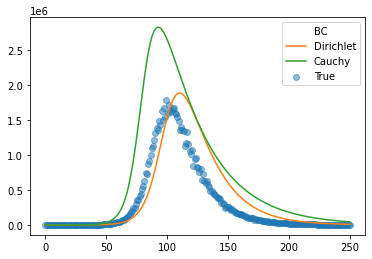

In [9]:
fig, ax = plt.subplots()
line = ax.scatter(plot_model.model.t_nn_synth, plot_model.model.wsol_synth[:,1], color=plot_model.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model.model.t_synth, plot_model.model.wsol_nn_synth[:,1], color=plot_model.colors[1], label='Dirichlet')
line = ax.plot(plot_model_neu.model.t_synth, plot_model_neu.model.wsol_nn_synth[:,1], color=plot_model_neu.colors[2], label='Cauchy')
ax.legend(title='BC')

total  [2.04643018e+05 1.47928048e+03 3.99489808e+06 7.98979617e+05]
total  4999999.999999999


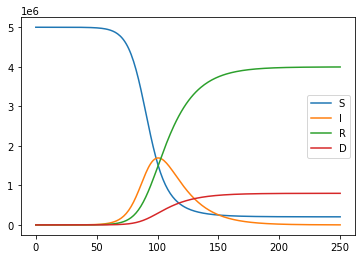

In [10]:
import ODE_SIR
solver = ODE_SIR.ODESolver()
t_synth_p, wsol_synth_p, N = solver.solve_SIRD(alpha_real, beta_real, gamma_real)
solver.plot_SIRD(t_synth_p, wsol_synth_p)
max_timestep = 85
t_bool = t_synth_p < max_timestep
t_p = t_synth_p[t_bool]
wsol_p = wsol_synth_p[t_bool]

In [11]:
model_p = SIRD_deepxde_net(t_p, wsol_p)
model_p.init_model(print_every=1000)
model_p.train_model(iterations=11000)
alpha_nn, beta_nn, gamma_nn = model_p.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_p.set_synthetic_data(t_synth_p, wsol_synth_p)
model_p.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000127 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [9.14e-04, 3.56e-02, 7.80e-03, 4.67e-03, 1.00e+00, 4.00e-12, 0.00e+00, 0.00e+00, 1.90e+00, 4.64e-01, 2.48e-01, 3.28e-02, 1.32e+00, 5.49e-01, 3.63e-01, 2.17e-02]    [9.14e-04, 3.56e-02, 7.80e-03, 4.67e-03, 1.00e+00, 4.00e-12, 0.00e+00, 0.00e+00, 1.90e+00, 4.64e-01, 2.48e-01, 3.28e-02, 1.32e+00, 5.49e-01, 3.63e-01, 2.17e-02]    []  
1000      [2.16e-05, 6.41e-06, 1.09e-05, 8.95e-06, 3.05e-05, 2.89e-06, 3.94e-04, 7.58e-04, 3.77e-03, 1.81e-03, 7.07e-04, 1.42e-03, 2.19e-04, 1.93e-04, 1.26e-04, 1.05e-03]    [2.16e-05, 6.41e-06, 1.09e-05, 8.95e-06, 3.05e-05, 2.89e-06, 3.94e-0

In [12]:
model_neu_p = SIRD_deepxde_net(t_p, wsol_p, with_neumann=True)
model_neu_p.init_model(print_every=1000)
model_neu_p.train_model(iterations=11000)
alpha_nn, beta_nn, gamma_nn = model_neu_p.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_neu_p.set_synthetic_data(t_synth_p, wsol_synth_p)
model_neu_p.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000113 s

Training model...

Step      Train loss                                                                                                                                                                                                  Test loss                                                                                                                                                                                                   Test metric
0         [1.35e-02, 5.12e-02, 6.17e-03, 6.21e-03, 1.00e+00, 4.00e-12, 0.00e+00, 0.00e+00, 3.03e+00, 5.26e-01, 6.64e-02, 9.93e-02, 2.24e+00, 7.04e-01, 1.94e-02, 1.58e-01, 5.75e-04, 1.96e-04, 6.49e-05, 1.01e-07]    [1.35e-02, 5.12e-02, 6.17e-03, 6.21e-03, 1.00e+00, 4.00e-12, 0.00e+00, 0.00e+00, 3.03e+00, 5.26e-01, 6.64e-02, 9.93e-02, 2.24e+00, 7.04e-01, 1.94e-02, 1.58e-01, 5.75e-04, 1.96e-04, 6.49e-05, 1.01e-07]    []  
1000      [9.32e-06, 4.71e-06, 1.50e-06, 3.57e-07, 4.45e-06, 9.00e-06, 7.78e-06, 2

In [13]:
values_to_plot = ['I']
plot_model_p = Plot(model_p, values_to_plot=values_to_plot)
plot_model_neu_p = Plot(model_neu_p, values_to_plot=values_to_plot)

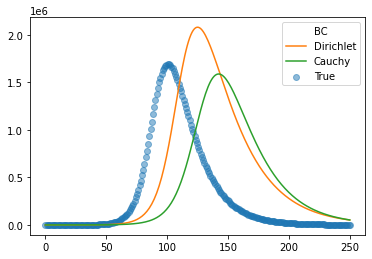

In [14]:
fig, ax = plt.subplots()
line = ax.scatter(plot_model_p.model.t_nn_synth, plot_model_p.model.wsol_synth[:,1], color=plot_model_p.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model_p.model.t_synth, plot_model_p.model.wsol_nn_synth[:,1], color=plot_model_p.colors[1], label='Dirichlet')
line = ax.plot(plot_model_neu_p.model.t_synth, plot_model_neu_p.model.wsol_nn_synth[:,1], color=plot_model_neu_p.colors[2], label='Cauchy')
ax.legend(title='BC')

# Weight tail higher

# Activation functions

* ReLU
* Leaky ReLU
* Elu
* Sigmoid
* Tanh

In [15]:
model_relu = SIRD_deepxde_net(t, wsol)
model_relu.init_model(print_every=1000, activation='relu')
model_relu.train_model(iterations=6000)
alpha_nn, beta_nn, gamma_nn = model_relu.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_relu.set_synthetic_data(t_synth, wsol_synth)
model_relu.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000161 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [2.32e-02, 2.58e-01, 2.80e-02, 2.41e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.40e+00, 2.46e+00, 1.18e-01, 1.15e-01, 3.46e+00, 7.96e+00, 2.97e-01, 3.58e-01]    [2.32e-02, 2.58e-01, 2.80e-02, 2.41e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.40e+00, 2.46e+00, 1.18e-01, 1.15e-01, 3.46e+00, 7.96e+00, 2.97e-01, 3.58e-01]    []  
1000      [3.46e-05, 9.47e-06, 5.87e-06, 4.13e-06, 2.41e-07, 5.79e-09, 3.73e-08, 3.79e-08, 3.53e-03, 4.33e-04, 4.39e-05, 8.01e-05, 2.31e-04, 7.09e-05, 2.15e-07, 8.61e-06]    [3.46e-05, 9.47e-06, 5.87e-06, 4.13e-06, 2.41e-07, 5.79e-09, 3.73e-0

In [16]:
model_elu = SIRD_deepxde_net(t, wsol)
model_elu.init_model(print_every=1000, activation='elu')
model_elu.train_model(iterations=6000)
alpha_nn, beta_nn, gamma_nn = model_elu.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_elu.set_synthetic_data(t_synth, wsol_synth)
model_elu.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000112 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [1.43e-01, 5.49e-02, 1.19e-01, 3.05e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.21e+00, 5.00e+00, 3.19e+01, 3.18e+00, 4.18e+00, 8.21e+00, 8.94e+01, 1.23e+01]    [1.43e-01, 5.49e-02, 1.19e-01, 3.05e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.21e+00, 5.00e+00, 3.19e+01, 3.18e+00, 4.18e+00, 8.21e+00, 8.94e+01, 1.23e+01]    []  
1000      [5.22e-05, 5.68e-06, 6.87e-06, 2.67e-06, 3.35e-08, 2.08e-08, 6.39e-08, 9.76e-10, 4.22e-03, 9.17e-05, 1.25e-04, 2.65e-05, 7.46e-06, 1.34e-04, 1.72e-04, 1.58e-05]    [5.22e-05, 5.68e-06, 6.87e-06, 2.67e-06, 3.35e-08, 2.08e-08, 6.39e-0

In [17]:
model_sig = SIRD_deepxde_net(t, wsol)
model_sig.init_model(print_every=1000, activation='sigmoid')
model_sig.train_model(iterations=6000)
alpha_nn, beta_nn, gamma_nn = model_sig.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_sig.set_synthetic_data(t_synth, wsol_synth)
model_sig.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000110 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [1.88e-04, 1.74e-02, 3.53e-03, 3.51e-03, 1.50e+00, 3.66e-01, 9.38e-02, 3.57e-02, 1.27e+00, 3.32e-01, 1.07e-01, 3.60e-02, 7.20e-01, 1.84e-01, 1.51e-01, 4.14e-02]    [1.88e-04, 1.74e-02, 3.53e-03, 3.51e-03, 1.50e+00, 3.66e-01, 9.38e-02, 3.57e-02, 1.27e+00, 3.32e-01, 1.07e-01, 3.60e-02, 7.20e-01, 1.84e-01, 1.51e-01, 4.14e-02]    []  


C:\Users\willi\anaconda3\lib\site-packages\torch\nn\functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


1000      [1.92e-05, 2.13e-07, 3.02e-07, 1.72e-07, 4.55e-07, 6.52e-08, 4.38e-08, 1.05e-08, 2.52e-03, 2.86e-05, 1.81e-05, 6.47e-07, 6.59e-06, 2.69e-08, 4.05e-07, 6.91e-11]    [1.92e-05, 2.13e-07, 3.02e-07, 1.72e-07, 4.55e-07, 6.52e-08, 4.38e-08, 1.05e-08, 2.52e-03, 2.86e-05, 1.81e-05, 6.47e-07, 6.59e-06, 2.69e-08, 4.05e-07, 6.91e-11]    []  
2000      [1.47e-05, 2.12e-06, 1.20e-06, 5.92e-07, 1.26e-04, 4.27e-05, 1.40e-09, 1.22e-04, 3.07e-03, 1.98e-04, 3.41e-05, 1.05e-04, 1.22e-03, 3.49e-04, 8.98e-05, 9.68e-05]    [1.47e-05, 2.12e-06, 1.20e-06, 5.92e-07, 1.26e-04, 4.27e-05, 1.40e-09, 1.22e-04, 3.07e-03, 1.98e-04, 3.41e-05, 1.05e-04, 1.22e-03, 3.49e-04, 8.98e-05, 9.68e-05]    []  
3000      [1.67e-05, 1.01e-06, 1.58e-06, 6.72e-07, 8.06e-05, 3.61e-06, 6.10e-04, 8.45e-05, 2.65e-03, 6.46e-05, 5.03e-04, 7.21e-05, 7.42e-05, 3.21e-06, 3.57e-04, 4.31e-05]    [1.67e-05, 1.01e-06, 1.58e-06, 6.72e-07, 8.06e-05, 3.61e-06, 6.10e-04, 8.45e-05, 2.65e-03, 6.46e-05, 5.03e-04, 7.21e-05, 7.42e-05, 3.21e-06,

In [18]:
model_tanh = SIRD_deepxde_net(t, wsol)
model_tanh.init_model(print_every=1000, activation='tanh')
model_tanh.train_model(iterations=6000)
alpha_nn, beta_nn, gamma_nn = model_tanh.get_best_params()
t_nn_param, wsol_nn_param, N_nn_param = solver.solve_SIRD(alpha_nn, beta_nn, gamma_nn)
model_tanh.set_synthetic_data(t_synth, wsol_synth)
model_tanh.set_nn_synthetic_data(t_nn_param, wsol_nn_param)

Compiling model...
'compile' took 0.000132 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [5.04e-03, 2.35e-03, 1.67e-03, 1.75e-04, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 3.72e+00, 2.98e-02, 4.56e-02, 4.16e-02, 2.67e+00, 7.84e-02, 6.51e-02, 4.55e-02]    [5.04e-03, 2.35e-03, 1.67e-03, 1.75e-04, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 3.72e+00, 2.98e-02, 4.56e-02, 4.16e-02, 2.67e+00, 7.84e-02, 6.51e-02, 4.55e-02]    []  
1000      [2.43e-05, 4.69e-06, 7.13e-06, 1.25e-06, 3.09e-04, 1.53e-04, 3.18e-04, 2.40e-05, 5.56e-03, 1.06e-03, 1.23e-03, 8.63e-05, 1.15e-03, 5.41e-04, 4.29e-04, 3.82e-05]    [2.43e-05, 4.69e-06, 7.13e-06, 1.25e-06, 3.09e-04, 1.53e-04, 3.18e-0

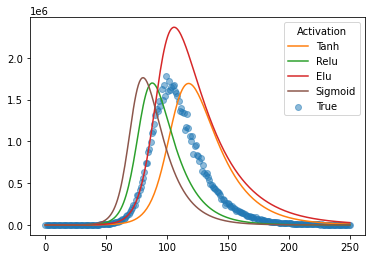

In [19]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model_tanh = Plot(model_tanh, values_to_plot=values_to_plot)
plot_model_relu = Plot(model_relu, values_to_plot=values_to_plot)
plot_model_elu = Plot(model_elu, values_to_plot=values_to_plot)
plot_model_sig = Plot(model_sig, values_to_plot=values_to_plot)

fig, ax = plt.subplots()
line = ax.scatter(plot_model.model.t_nn_synth, plot_model.model.wsol_synth[:,1], color=plot_model.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model_tanh.model.t_synth, plot_model_tanh.model.wsol_nn_synth[:,1], color=plot_model_tanh.colors[1], label='Tanh')
line = ax.plot(plot_model_relu.model.t_synth, plot_model_relu.model.wsol_nn_synth[:,1], color=plot_model_relu.colors[2], label='Relu')
line = ax.plot(plot_model_elu.model.t_synth, plot_model_elu.model.wsol_nn_synth[:,1], color=plot_model_elu.colors[3], label='Elu')
line = ax.plot(plot_model_sig.model.t_synth, plot_model_sig.model.wsol_nn_synth[:,1], color='C5', label='Sigmoid')

ax.legend(title='Activation')

# Layer size

In [20]:
iterations=6000

In [21]:
model_2l = SIRD_deepxde_net(t, wsol)
layer_size = [1] + [32] * 2 + [4]
model_2l.run_all(t_synth, wsol_synth, solver, layer_size=layer_size,iterations=iterations)

Compiling model...
'compile' took 0.000376 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [1.64e-03, 6.18e-03, 1.11e-02, 3.62e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.23e+00, 8.92e-02, 3.39e+00, 1.41e+00, 1.65e+00, 1.76e-01, 4.40e+00, 1.87e+00]    [1.64e-03, 6.18e-03, 1.11e-02, 3.62e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.23e+00, 8.92e-02, 3.39e+00, 1.41e+00, 1.65e+00, 1.76e-01, 4.40e+00, 1.87e+00]    []  
1000      [2.69e-05, 8.31e-06, 1.31e-06, 2.54e-06, 4.86e-11, 1.27e-08, 9.39e-09, 3.57e-09, 5.53e-03, 8.19e-04, 1.34e-04, 1.90e-05, 7.03e-04, 1.41e-04, 2.25e-06, 2.70e-06]    [2.69e-05, 8.31e-06, 1.31e-06, 2.54e-06, 4.86e-11, 1.27e-08, 9.39e-0

In [22]:
model_3l = SIRD_deepxde_net(t, wsol)
layer_size = [1] + [32] * 3 + [4]
model_3l.run_all(t_synth, wsol_synth, solver, layer_size=layer_size,iterations=iterations)

Compiling model...
'compile' took 0.000129 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [6.50e-03, 1.26e-02, 2.78e-03, 1.20e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.59e+00, 9.88e-02, 1.09e-01, 1.22e+00, 8.38e-01, 1.61e-01, 1.24e-01, 1.29e+00]    [6.50e-03, 1.26e-02, 2.78e-03, 1.20e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 1.59e+00, 9.88e-02, 1.09e-01, 1.22e+00, 8.38e-01, 1.61e-01, 1.24e-01, 1.29e+00]    []  
1000      [2.07e-05, 3.38e-06, 1.16e-06, 5.12e-06, 6.10e-08, 1.92e-08, 1.88e-08, 4.20e-09, 4.43e-03, 5.50e-04, 1.37e-04, 6.41e-06, 2.63e-04, 4.69e-05, 1.88e-05, 3.77e-07]    [2.07e-05, 3.38e-06, 1.16e-06, 5.12e-06, 6.10e-08, 1.92e-08, 1.88e-0

In [23]:
model_4l = SIRD_deepxde_net(t, wsol)
layer_size = [1] + [32] * 4 + [4]
model_4l.run_all(t_synth, wsol_synth, solver, layer_size=layer_size,iterations=iterations)

Compiling model...
'compile' took 0.000170 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [8.93e-03, 3.68e-03, 4.36e-03, 8.85e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 6.90e-02, 2.67e-03, 2.72e-01, 1.42e+00, 6.29e-03, 1.42e-02, 3.35e-01, 1.73e+00]    [8.93e-03, 3.68e-03, 4.36e-03, 8.85e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 6.90e-02, 2.67e-03, 2.72e-01, 1.42e+00, 6.29e-03, 1.42e-02, 3.35e-01, 1.73e+00]    []  
1000      [5.60e-05, 1.02e-05, 2.72e-06, 7.55e-07, 1.19e-05, 2.42e-05, 7.34e-06, 5.35e-06, 6.10e-03, 7.82e-04, 3.63e-04, 4.33e-05, 3.87e-05, 3.04e-04, 2.89e-05, 4.12e-06]    [5.60e-05, 1.02e-05, 2.72e-06, 7.55e-07, 1.19e-05, 2.42e-05, 7.34e-0

In [24]:
model_5l = SIRD_deepxde_net(t, wsol)
layer_size = [1] + [32] * 5 + [4]
model_5l.run_all(t_synth, wsol_synth, solver, layer_size=layer_size,iterations=iterations)

Compiling model...
'compile' took 0.000147 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [1.56e-03, 1.31e-02, 4.04e-03, 1.93e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.15e+00, 1.80e-01, 4.29e-01, 1.90e-02, 1.46e+00, 3.69e-01, 3.65e-01, 1.60e-02]    [1.56e-03, 1.31e-02, 4.04e-03, 1.93e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 2.15e+00, 1.80e-01, 4.29e-01, 1.90e-02, 1.46e+00, 3.69e-01, 3.65e-01, 1.60e-02]    []  
1000      [2.00e-05, 1.83e-06, 6.55e-07, 3.41e-07, 2.98e-05, 2.46e-07, 7.79e-06, 1.44e-05, 4.08e-03, 3.77e-04, 9.11e-05, 2.80e-05, 1.96e-04, 7.28e-06, 3.65e-07, 2.55e-05]    [2.00e-05, 1.83e-06, 6.55e-07, 3.41e-07, 2.98e-05, 2.46e-07, 7.79e-0

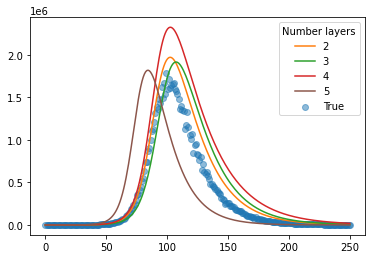

In [25]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model_2l = Plot(model_2l, values_to_plot=values_to_plot)
plot_model_3l = Plot(model_3l, values_to_plot=values_to_plot)
plot_model_4l = Plot(model_4l, values_to_plot=values_to_plot)
plot_model_5l = Plot(model_5l, values_to_plot=values_to_plot)

fig, ax = plt.subplots()
line = ax.scatter(plot_model.model.t_nn_synth, plot_model.model.wsol_synth[:,1], color=plot_model.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model_2l.model.t_synth, plot_model_2l.model.wsol_nn_synth[:,1], color=plot_model_2l.colors[1], label='2')
line = ax.plot(plot_model_3l.model.t_synth, plot_model_3l.model.wsol_nn_synth[:,1], color=plot_model_3l.colors[2], label='3')
line = ax.plot(plot_model_4l.model.t_synth, plot_model_4l.model.wsol_nn_synth[:,1], color=plot_model_4l.colors[3], label='4')
line = ax.plot(plot_model_5l.model.t_synth, plot_model_5l.model.wsol_nn_synth[:,1], color='C5', label='5')

ax.legend(title='Number layers')

# Initializer?

# Learn rate (optimizer)

In [26]:
iterations=6000

In [27]:
model_0001l = SIRD_deepxde_net(t, wsol)
lr=0.001
model_0001l.run_all(t_synth, wsol_synth, solver, lr=lr, iterations=iterations)

Compiling model...
'compile' took 0.000125 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [9.78e-05, 4.38e-03, 4.08e-03, 3.79e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 5.45e-01, 1.38e-01, 2.63e-01, 2.04e-01, 1.41e-01, 3.89e-01, 3.24e-01, 2.06e-01]    [9.78e-05, 4.38e-03, 4.08e-03, 3.79e-03, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 5.45e-01, 1.38e-01, 2.63e-01, 2.04e-01, 1.41e-01, 3.89e-01, 3.24e-01, 2.06e-01]    []  
1000      [3.97e-05, 4.09e-06, 9.94e-07, 4.17e-07, 1.10e-07, 1.09e-08, 4.65e-09, 4.03e-10, 4.19e-03, 4.52e-04, 9.73e-05, 1.08e-05, 2.98e-04, 5.48e-05, 1.29e-05, 1.08e-06]    [3.97e-05, 4.09e-06, 9.94e-07, 4.17e-07, 1.10e-07, 1.09e-08, 4.65e-0

In [28]:
model_001l = SIRD_deepxde_net(t, wsol)
lr=0.01
model_001l.run_all(t_synth, wsol_synth, solver, lr=lr, iterations=iterations)

Compiling model...
'compile' took 0.000271 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [5.86e-04, 8.39e-03, 2.53e-03, 5.83e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 3.65e-01, 2.39e-01, 3.64e-02, 2.42e+00, 1.10e-01, 2.07e-01, 1.32e-02, 2.46e+00]    [5.86e-04, 8.39e-03, 2.53e-03, 5.83e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 3.65e-01, 2.39e-01, 3.64e-02, 2.42e+00, 1.10e-01, 2.07e-01, 1.32e-02, 2.46e+00]    []  
1000      [2.13e-05, 6.47e-06, 3.11e-06, 6.86e-06, 1.91e-05, 3.25e-09, 2.41e-05, 4.07e-05, 5.05e-03, 7.31e-04, 5.49e-04, 1.62e-04, 3.38e-04, 5.37e-05, 1.07e-04, 4.81e-05]    [2.13e-05, 6.47e-06, 3.11e-06, 6.86e-06, 1.91e-05, 3.25e-09, 2.41e-0

In [29]:
model_01l = SIRD_deepxde_net(t, wsol)
lr=0.1
model_01l.run_all(t_synth, wsol_synth, solver, lr=lr, iterations=iterations)

Compiling model...
'compile' took 0.000111 s

Training model...

Step      Train loss                                                                                                                                                          Test loss                                                                                                                                                           Test metric
0         [2.42e-03, 5.20e-03, 2.16e-03, 2.91e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 9.91e-01, 3.23e-02, 1.37e-02, 3.55e-01, 4.40e-01, 3.89e-03, 7.61e-04, 2.65e-01]    [2.42e-03, 5.20e-03, 2.16e-03, 2.91e-02, 1.00e+00, 3.51e-12, 0.00e+00, 0.00e+00, 9.91e-01, 3.23e-02, 1.37e-02, 3.55e-01, 4.40e-01, 3.89e-03, 7.61e-04, 2.65e-01]    []  
1000      [1.96e-05, 1.75e-06, 2.34e-06, 2.48e-06, 2.65e-02, 3.94e-03, 5.35e-05, 2.93e-05, 8.90e-03, 3.30e-03, 4.04e-04, 2.52e-05, 4.79e-02, 9.61e-03, 5.60e-03, 9.47e-05]    [1.96e-05, 1.75e-06, 2.34e-06, 2.48e-06, 2.65e-02, 3.94e-03, 5.35e-0

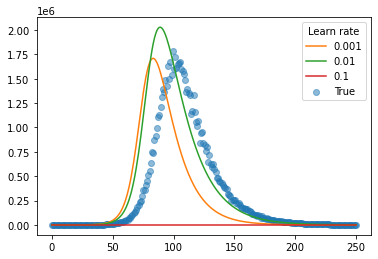

In [30]:
values_to_plot = ['I']
plot_model = Plot(model, values_to_plot=values_to_plot)
plot_model_0001l = Plot(model_0001l, values_to_plot=values_to_plot)
plot_model_001l = Plot(model_001l, values_to_plot=values_to_plot)
plot_model_01l = Plot(model_01l, values_to_plot=values_to_plot)

fig, ax = plt.subplots()
line = ax.scatter(plot_model.model.t_nn_synth, plot_model.model.wsol_synth[:,1], color=plot_model.colors[0], label='True',alpha=0.5)
line = ax.plot(plot_model_0001l.model.t_synth, plot_model_0001l.model.wsol_nn_synth[:,1], color=plot_model_0001l.colors[1], label='0.001')
line = ax.plot(plot_model_001l.model.t_synth, plot_model_001l.model.wsol_nn_synth[:,1], color=plot_model_001l.colors[2], label='0.01')
line = ax.plot(plot_model_01l.model.t_synth, plot_model_01l.model.wsol_nn_synth[:,1], color=plot_model_01l.colors[3], label='0.1')

ax.legend(title='Learn rate')